# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [2]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

2026-02-01 16:57:21.781478: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


       0/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

   90112/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step

  303104/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

  778240/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

 1761280/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

 2580480/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

 3702784/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

 4857856/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

 5619712/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

 6782976/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

 8011776/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

 8896512/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

10633216/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [4]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   7 118 138  76  24  24  24  

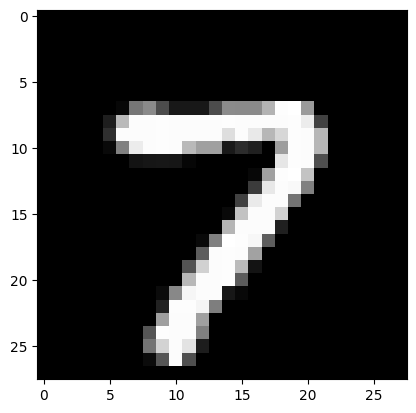

In [5]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


**Sanity check 1:** Find the shape of the train and test data and lebels



In [6]:
print("Train images shape:", train_images_orig.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images_orig.shape)
print("Test labels shape:", test_labels.shape)
print("Number of training samples:", len(train_images_orig))
print("Number of test samples:", len(test_images_orig))

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of training samples: 60000
Number of test samples: 10000


**Sanity Check 2:** Print the labels. How many unique label value do you see?

In [7]:
print("Unique labels:", np.unique(train_labels))
print("Number of unique labels:", len(np.unique(train_labels)))

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of unique labels: 10


### **Exercise 1:** Display the fourth image in the `test set` with its label.

Label: 0


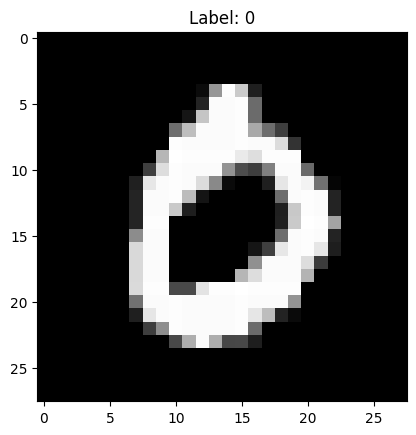

In [8]:
sample_image = test_images_orig[3]
print("Label:", test_labels[3])
plt.imshow(sample_image, cmap="gray")
plt.title(f"Label: {test_labels[3]}")
plt.show()

# A first look at a neural network

## **Step 1:** The network architecture

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Input(shape=(784,)), #or shape=(28*28,)
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

In [10]:
train_images = train_images_orig.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [11]:
print("Train images shape after preprocessing:", train_images.shape)
print("Test images shape after preprocessing:", test_images.shape)

Train images shape after preprocessing: (60000, 784)
Test images shape after preprocessing: (10000, 784)


### Tensor reshaping

In [12]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [13]:
a_reshaped = a.reshape((6, 1))
print(a_reshaped)
print("Shape:", a_reshaped.shape)

[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Shape: (6, 1)


### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

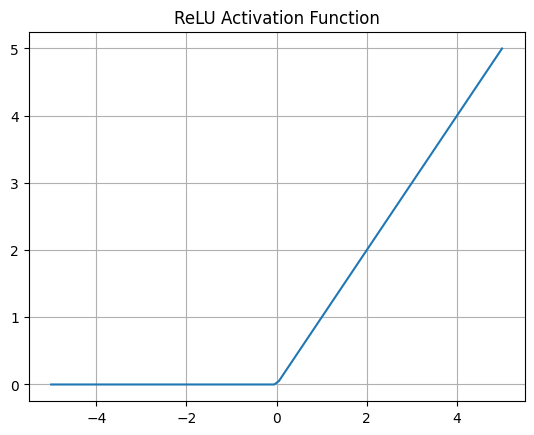

In [14]:
def relu(x):
  return np.maximum(0, x)

x = np.linspace(-5, 5, 100)
y = relu(x)

plt.plot(x, y)
plt.title("ReLU Activation Function")
plt.grid()
plt.show()

In [15]:
# my solution output

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

The result after passing `[-10, 5, 0, -2, 6]` through ReLU is `[0, 5, 0, 0, 6]`. ReLU replaces all negative values with 0 and keeps positive values unchanged.

### **Output layer** - `Sigmoid` and `Softmax` activation function

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

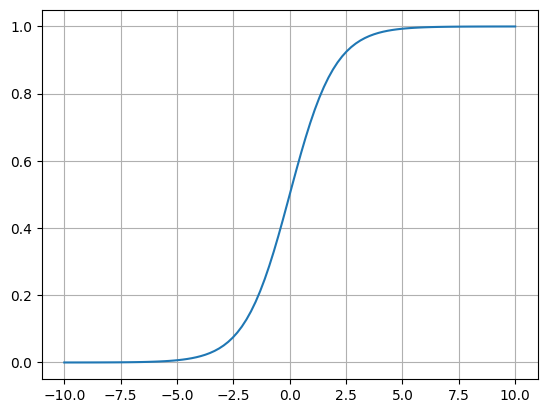

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Show bar plot of last layer values before applying any activation function (logits)
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

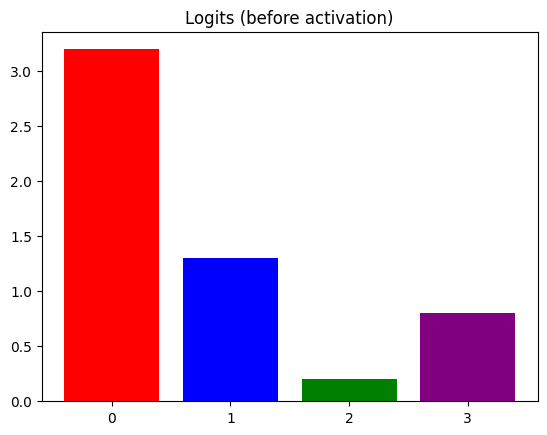

In [17]:
logits = np.array([3.2, 1.3, 0.2, 0.8])

plt.bar(np.arange(4), logits, color=['red', 'blue', 'green', 'purple'])
plt.title("Logits (before activation)")
plt.xticks(np.arange(4))
plt.show()

[0.96083428 0.78583498 0.549834   0.68997448]


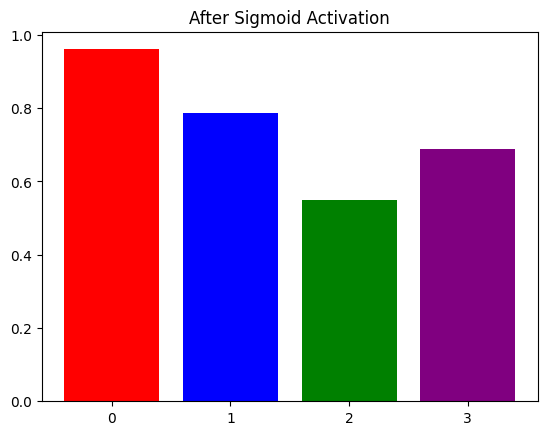

In [18]:
logits = np.array([3.2, 1.3, 0.2, 0.8])
logits_scaled = sigmoid(logits)
print(logits_scaled)

plt.bar(np.arange(4), logits_scaled, color=['red', 'blue', 'green', 'purple'])
plt.title("After Sigmoid Activation")
plt.xticks(np.arange(4))
plt.show()

In [19]:
#my solution output

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [20]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

Probabilities: [0.77514955 0.11593805 0.03859242 0.07031998]
Sum of probabilities: 1.0000000000000002


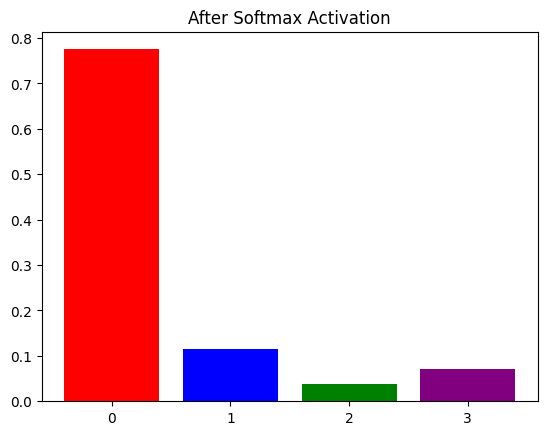

In [21]:
logits = np.array([3.2, 1.3, 0.2, 0.8])
probs = softmax(logits)
print("Probabilities:", probs)
print("Sum of probabilities:", np.sum(probs))

plt.bar(np.arange(4), probs, color=['red', 'blue', 'green', 'purple'])
plt.title("After Softmax Activation")
plt.xticks(np.arange(4))
plt.show()

In [22]:
#my solution output

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [23]:
predicted_class = np.argmax(probs)
print("Predicted class:", predicted_class)

Predicted class: 0


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels. By taking argmax from the probabilty distribtion you can get the predicted label**







## **Step 2:** The compilation step

In [24]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

Revisit the model:

```python
model = keras.Sequential([
    layers.Input(shape=(784,)), #or shape=(28*28,)
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
```




## **Step 3:** "Fitting" the model

In [25]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


  1/469 ━━━━━━━━━━━━━━━━━━━━ 4:06 527ms/step - accuracy: 0.1562 - loss: 2.3142

 12/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4880 - loss: 1.6114    

 25/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6007 - loss: 1.3020

 37/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6543 - loss: 1.1436

 51/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6942 - loss: 1.0208

 64/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7199 - loss: 0.9402

 77/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7395 - loss: 0.8784

 90/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7551 - loss: 0.8286

104/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7686 - loss: 0.7848

117/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7791 - loss: 0.7508

130/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7881 - loss: 0.7214

143/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7959 - loss: 0.6959

156/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8027 - loss: 0.6733

169/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8088 - loss: 0.6533

182/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8143 - loss: 0.6350

195/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8193 - loss: 0.6184

208/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8238 - loss: 0.6032

222/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8282 - loss: 0.5882

235/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8321 - loss: 0.5755

247/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8353 - loss: 0.5645

260/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8386 - loss: 0.5534

273/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8417 - loss: 0.5430

286/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8446 - loss: 0.5332

299/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8474 - loss: 0.5240

312/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8499 - loss: 0.5152

325/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8524 - loss: 0.5070

338/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8547 - loss: 0.4992

350/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8567 - loss: 0.4924

361/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8585 - loss: 0.4865

373/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8603 - loss: 0.4802

385/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8621 - loss: 0.4743

398/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8639 - loss: 0.4681

411/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8657 - loss: 0.4621

424/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8674 - loss: 0.4564

437/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8690 - loss: 0.4510

449/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8704 - loss: 0.4461

461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8718 - loss: 0.4414

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9246 - loss: 0.2619


Epoch 2/5


  1/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9688 - loss: 0.1152

 12/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9592 - loss: 0.1297  

 25/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9591 - loss: 0.1289

 38/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9597 - loss: 0.1279

 52/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9604 - loss: 0.1274

 64/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9608 - loss: 0.1271

 77/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9611 - loss: 0.1266

 90/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9614 - loss: 0.1261

103/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9616 - loss: 0.1254

114/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9619 - loss: 0.1249

124/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9620 - loss: 0.1244

135/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9622 - loss: 0.1240

147/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9623 - loss: 0.1235

159/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9624 - loss: 0.1231

171/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9625 - loss: 0.1228

183/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9627 - loss: 0.1223

195/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9628 - loss: 0.1219

208/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9630 - loss: 0.1215

221/469 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9631 - loss: 0.1210

233/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9632 - loss: 0.1207

245/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9634 - loss: 0.1204

256/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9635 - loss: 0.1200

268/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9636 - loss: 0.1197

280/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9637 - loss: 0.1194

292/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9638 - loss: 0.1191

304/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9639 - loss: 0.1189

315/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9639 - loss: 0.1186

328/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9641 - loss: 0.1183

340/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9641 - loss: 0.1180

353/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9642 - loss: 0.1178

365/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9643 - loss: 0.1175

378/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9644 - loss: 0.1173

391/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9645 - loss: 0.1170

403/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9646 - loss: 0.1168

414/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9647 - loss: 0.1166

426/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9647 - loss: 0.1164

439/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9648 - loss: 0.1161

451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9649 - loss: 0.1159

463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9650 - loss: 0.1157

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9678 - loss: 0.1078


Epoch 3/5


  1/469 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9766 - loss: 0.0723

 11/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9744 - loss: 0.0875  

 21/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9769 - loss: 0.0833

 32/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9779 - loss: 0.0816

 44/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9783 - loss: 0.0808

 56/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9786 - loss: 0.0794

 68/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9789 - loss: 0.0783

 79/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9788 - loss: 0.0780

 91/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9788 - loss: 0.0778

103/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9787 - loss: 0.0775

115/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9787 - loss: 0.0774

126/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9786 - loss: 0.0771

137/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9786 - loss: 0.0770

149/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9785 - loss: 0.0769

161/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9784 - loss: 0.0768

173/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9784 - loss: 0.0767

185/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9783 - loss: 0.0766

198/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9783 - loss: 0.0764

210/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9783 - loss: 0.0762

221/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9783 - loss: 0.0761

232/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9783 - loss: 0.0760

243/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9783 - loss: 0.0759

254/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0758

266/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0757

278/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0756

290/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0754

302/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0753

314/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0752

326/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.0751

337/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.0750

348/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.0749

360/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.0748

371/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.0747

382/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.0746

394/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.0745

407/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9784 - loss: 0.0743

419/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9785 - loss: 0.0743

430/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9785 - loss: 0.0742

441/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9785 - loss: 0.0741

453/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9785 - loss: 0.0740

464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9785 - loss: 0.0739

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9790 - loss: 0.0707


Epoch 4/5


  1/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9766 - loss: 0.0528

 11/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9886 - loss: 0.0391  

 21/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9888 - loss: 0.0398

 31/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9890 - loss: 0.0402

 42/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9889 - loss: 0.0412

 53/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9885 - loss: 0.0424

 65/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9882 - loss: 0.0435

 76/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9880 - loss: 0.0442

 88/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9879 - loss: 0.0446

 99/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9877 - loss: 0.0449

111/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9875 - loss: 0.0453

123/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9874 - loss: 0.0457

134/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9873 - loss: 0.0460

145/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9871 - loss: 0.0463

158/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9870 - loss: 0.0467

169/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9869 - loss: 0.0470

180/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9867 - loss: 0.0473

191/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9867 - loss: 0.0475

202/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9866 - loss: 0.0477

214/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9865 - loss: 0.0479

225/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9864 - loss: 0.0480

236/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9864 - loss: 0.0482

247/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9863 - loss: 0.0484

258/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9863 - loss: 0.0485

270/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9862 - loss: 0.0487

281/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9862 - loss: 0.0488

292/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9861 - loss: 0.0489

304/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9861 - loss: 0.0490

315/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9860 - loss: 0.0491

325/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9860 - loss: 0.0492

335/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9860 - loss: 0.0492

345/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9860 - loss: 0.0493

356/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9860 - loss: 0.0493

367/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9859 - loss: 0.0494

380/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9859 - loss: 0.0495

392/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9859 - loss: 0.0496

402/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9858 - loss: 0.0496

413/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9858 - loss: 0.0497

424/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9858 - loss: 0.0497

434/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9858 - loss: 0.0498

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9857 - loss: 0.0498

457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9857 - loss: 0.0498

468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9857 - loss: 0.0499

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9848 - loss: 0.0513


Epoch 5/5


  1/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9922 - loss: 0.0301

 12/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9854 - loss: 0.0427  

 24/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9871 - loss: 0.0385

 35/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9879 - loss: 0.0376

 46/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9884 - loss: 0.0377

 56/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9887 - loss: 0.0376

 68/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9889 - loss: 0.0378

 77/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9889 - loss: 0.0380

 88/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9890 - loss: 0.0380

 98/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

108/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

119/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9892 - loss: 0.0381

130/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9892 - loss: 0.0381

141/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9892 - loss: 0.0381

153/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9892 - loss: 0.0381

165/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9892 - loss: 0.0381

176/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

186/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

196/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

207/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

219/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

229/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

239/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

249/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

260/469 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9891 - loss: 0.0381

270/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9891 - loss: 0.0381

281/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9891 - loss: 0.0381

292/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0382

302/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0382

312/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0382

322/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0382

333/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0382

343/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0382

353/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

364/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

375/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

386/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

398/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

408/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

418/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

427/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

436/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

445/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9890 - loss: 0.0383

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9887 - loss: 0.0385


## **Step 4:** Using the model to make predictions

In [26]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
print("input shape:", test_digits.shape)

predictions = model.predict(test_digits)
print("output shape: ", predictions.shape)
predictions


input shape: (3, 784)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


output shape:  (3, 10)


array([[1.2846361e-07, 7.0695765e-09, 1.3640093e-05, 8.5001273e-05,
        4.2954251e-11, 1.5234845e-07, 4.5523602e-12, 9.9989164e-01,
        1.4739021e-07, 9.2717028e-06],
       [9.6916901e-09, 1.1688933e-05, 9.9995303e-01, 2.4996560e-05,
        1.5186498e-13, 5.5880431e-08, 1.4154121e-07, 7.3477743e-14,
        1.0077221e-05, 3.1332211e-12],
       [2.3266419e-07, 9.9934560e-01, 1.7878354e-04, 1.0233365e-05,
        6.6380577e-05, 1.3661276e-05, 9.5312980e-06, 2.3745491e-04,
        1.3644474e-04, 1.5888147e-06]], dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

The `predictions` array has shape (3, 10). Each row represents the probability distribution over the 10 digit classes (0-9) for one input image. Each value is the probability that the input image belongs to that class, and the values in each row sum to 1. The index with the highest probability is the predicted label.

### See the result for the prediction of the first image

In [27]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[1.2846361e-07 7.0695765e-09 1.3640093e-05 8.5001273e-05 4.2954251e-11
 1.5234845e-07 4.5523602e-12 9.9989164e-01 1.4739021e-07 9.2717028e-06]
Predicted label:  7


In [28]:
print("highest prob: ", predictions[0][7])

highest prob:  0.99989164


In [29]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


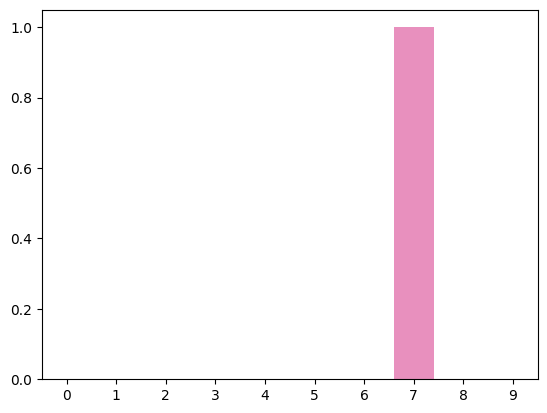

In [30]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


Predicted label: 0
True label: 0
Probability distribution: [9.9993432e-01 1.4953742e-09 1.2882921e-05 8.9680761e-08 2.8227806e-08
 6.6453447e-07 4.7755879e-05 1.7542127e-06 2.9665983e-09 2.5150473e-06]


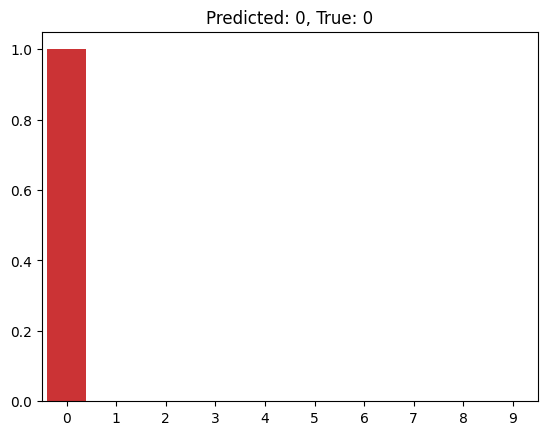

In [31]:
fourth_image = test_images[3:4]  # shape (1, 784) - batch format
prediction = model.predict(fourth_image)
predicted_label = np.argmax(prediction[0])
true_label = test_labels[3]

print("Predicted label:", predicted_label)
print("True label:", true_label)
print("Probability distribution:", prediction[0])

sns.barplot(x=np.arange(10), y=prediction[0], hue=np.arange(10), palette='Set1', legend=False)
plt.title(f"Predicted: {predicted_label}, True: {true_label}")
plt.xticks(np.arange(10))
plt.show()

## **Step 5:** Evaluating the model on new data

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

  1/313 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 1.0000 - loss: 0.0033

 25/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.0263   

 53/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9848 - loss: 0.0478

 80/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9805 - loss: 0.0613

108/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9785 - loss: 0.0683

137/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9772 - loss: 0.0720

166/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.0743

190/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9760 - loss: 0.0749

218/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9759 - loss: 0.0751

243/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9760 - loss: 0.0746

272/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9763 - loss: 0.0737

305/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.0724

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.0625


test_acc: 0.9800000190734863


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.